<a href="https://colab.research.google.com/github/Pankhuri33/CustomerSegmentAnalysis/blob/main/CustomerAnalysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv("Mall_Customers.csv")

In [3]:

data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


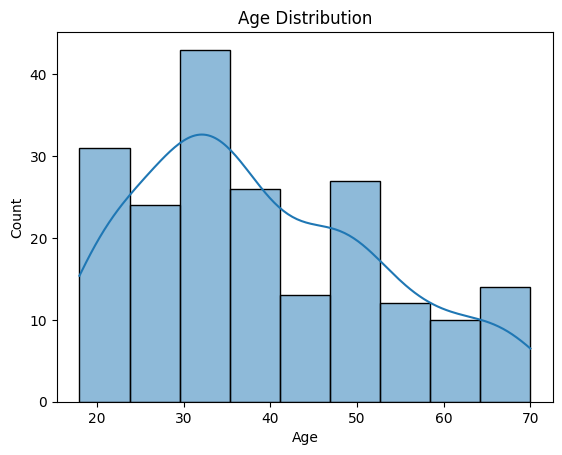

In [4]:
data.describe()

# Visualize distribution of features
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

In [5]:
# Selecting relevant features
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

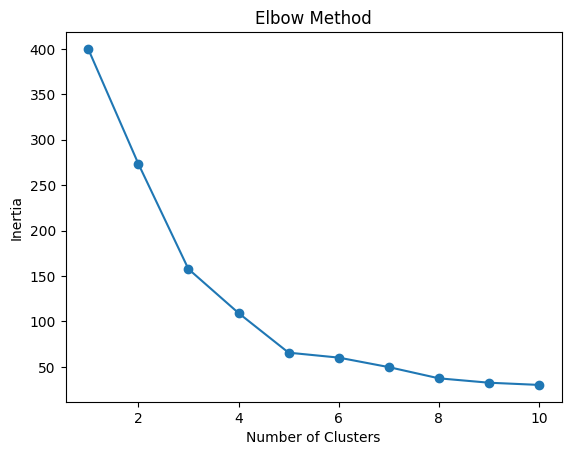

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
optimal_clusters = 5

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Add labels to original data
data['Cluster'] = labels

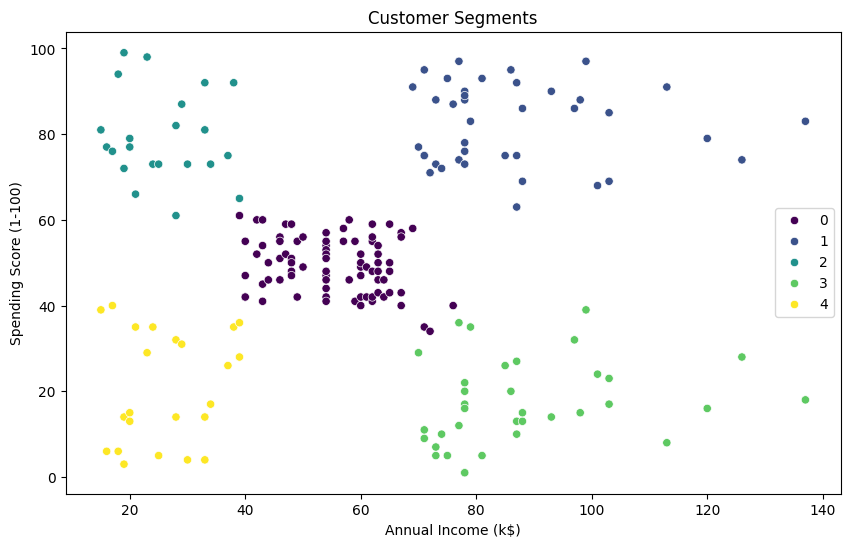

In [9]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=features['Annual Income (k$)'],
    y=features['Spending Score (1-100)'],
    hue=labels,
    palette='viridis'
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [10]:
import pickle

# Save the KMeans model
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)